In [5]:
!pip install -U scikit-learn
!pip install pyngrok
from pyngrok import ngrok
!pip install prophet
from prophet import Prophet
import matplotlib.pyplot as plt

In [6]:
import requests
import pandas as pd
from io import StringIO

# List of raw URLs for JSON files on GitHub
urls = [
    "https://raw.githubusercontent.com/oazzaf/ai-capstone-workflow/main/data/cs-train/invoices-2017-11.json",
    "https://raw.githubusercontent.com/oazzaf/ai-capstone-workflow/main/data/cs-train/invoices-2017-12.json",
    "https://raw.githubusercontent.com/oazzaf/ai-capstone-workflow/main/data/cs-train/invoices-2018-01.json",
    "https://raw.githubusercontent.com/oazzaf/ai-capstone-workflow/main/data/cs-train/invoices-2018-02.json",
    "https://raw.githubusercontent.com/oazzaf/ai-capstone-workflow/main/data/cs-train/invoices-2018-03.json",
    "https://raw.githubusercontent.com/oazzaf/ai-capstone-workflow/main/data/cs-train/invoices-2018-04.json",
    "https://raw.githubusercontent.com/oazzaf/ai-capstone-workflow/main/data/cs-train/invoices-2018-05.json",
    "https://raw.githubusercontent.com/oazzaf/ai-capstone-workflow/main/data/cs-train/invoices-2018-06.json",
    "https://raw.githubusercontent.com/oazzaf/ai-capstone-workflow/main/data/cs-train/invoices-2018-07.json",
    "https://raw.githubusercontent.com/oazzaf/ai-capstone-workflow/main/data/cs-train/invoices-2018-08.json",
    "https://raw.githubusercontent.com/oazzaf/ai-capstone-workflow/main/data/cs-train/invoices-2018-09.json",
    "https://raw.githubusercontent.com/oazzaf/ai-capstone-workflow/main/data/cs-train/invoices-2018-10.json",
    "https://raw.githubusercontent.com/oazzaf/ai-capstone-workflow/main/data/cs-train/invoices-2018-11.json",
    "https://raw.githubusercontent.com/oazzaf/ai-capstone-workflow/main/data/cs-train/invoices-2018-12.json",
    "https://raw.githubusercontent.com/oazzaf/ai-capstone-workflow/main/data/cs-train/invoices-2019-01.json",
    "https://raw.githubusercontent.com/oazzaf/ai-capstone-workflow/main/data/cs-train/invoices-2019-02.json",
    "https://raw.githubusercontent.com/oazzaf/ai-capstone-workflow/main/data/cs-train/invoices-2019-03.json",
    "https://raw.githubusercontent.com/oazzaf/ai-capstone-workflow/main/data/cs-train/invoices-2019-04.json",
    "https://raw.githubusercontent.com/oazzaf/ai-capstone-workflow/main/data/cs-train/invoices-2019-05.json",
    "https://raw.githubusercontent.com/oazzaf/ai-capstone-workflow/main/data/cs-train/invoices-2019-06.json",
    "https://raw.githubusercontent.com/oazzaf/ai-capstone-workflow/main/data/cs-train/invoices-2019-07.json",
]

# Initialize an empty list to store DataFrames
df_list = []

# Loop through the URLs and load the JSON files into a DataFrame
for url in urls:
    try:
        # Make a request to get the JSON data
        response = requests.get(url)

        # Check if the request was successful (status code 200)
        if response.status_code == 200:
            print(f"Successfully fetched: {url}")
            # Convert the JSON response to a file-like object
            data = StringIO(response.text)
            # Load the data into a DataFrame
            df = pd.read_json(data)
            # Append the DataFrame to the list
            df_list.append(df)
        else:
            print(f"Failed to retrieve: {url}")

    except Exception as e:
        print(f"Error fetching {url}: {e}")

# Concatenate all DataFrames into one large DataFrame
df_all = pd.concat(df_list, ignore_index=True)

# Check for any missing data or NaN values
print(f"Total rows of data: {len(df_all)}")
print(f"Rows with missing values (NaN):\n{df_all.isna().sum()}")

# Show the first few rows of the combined DataFrame
print(df_all.head())

Successfully fetched: https://raw.githubusercontent.com/oazzaf/ai-capstone-workflow/main/data/cs-train/invoices-2017-11.json
Successfully fetched: https://raw.githubusercontent.com/oazzaf/ai-capstone-workflow/main/data/cs-train/invoices-2017-12.json
Successfully fetched: https://raw.githubusercontent.com/oazzaf/ai-capstone-workflow/main/data/cs-train/invoices-2018-01.json
Successfully fetched: https://raw.githubusercontent.com/oazzaf/ai-capstone-workflow/main/data/cs-train/invoices-2018-02.json
Successfully fetched: https://raw.githubusercontent.com/oazzaf/ai-capstone-workflow/main/data/cs-train/invoices-2018-03.json
Successfully fetched: https://raw.githubusercontent.com/oazzaf/ai-capstone-workflow/main/data/cs-train/invoices-2018-04.json
Successfully fetched: https://raw.githubusercontent.com/oazzaf/ai-capstone-workflow/main/data/cs-train/invoices-2018-05.json
Successfully fetched: https://raw.githubusercontent.com/oazzaf/ai-capstone-workflow/main/data/cs-train/invoices-2018-06.json


In [7]:
# Fill missing numerical values with the mean of the column
df_all['total_price'] = df_all['total_price'].fillna(df_all['total_price'].mean())
df_all['price'] = df_all['price'].fillna(df_all['price'].mean())

# For categorical data, fill missing values with the most frequent value
df_all['country'] = df_all['country'].fillna(df_all['country'].mode()[0])
df_all['year'] = df_all['year'].fillna(df_all['year'].mode()[0])

# Fill missing numerical values with mean
numerical_cols = df_all.select_dtypes(include='number').columns
for col in numerical_cols:
    mean_val = df_all[col].mean()
    df_all[col] = df_all[col].fillna(mean_val)

# Fill missing categorical values with mode
categorical_cols = df_all.select_dtypes(include='object').columns
for col in categorical_cols:
    mode_val = df_all[col].mode()[0]
    df_all[col] = df_all[col].fillna(mode_val)

# Check if there are any remaining missing values
print(df_all.isnull().sum())

country         0
customer_id     0
invoice         0
price           0
stream_id       0
times_viewed    0
year            0
month           0
day             0
total_price     0
StreamID        0
TimesViewed     0
dtype: int64


In [8]:
print(df_all.columns)

Index(['country', 'customer_id', 'invoice', 'price', 'stream_id',
       'times_viewed', 'year', 'month', 'day', 'total_price', 'StreamID',
       'TimesViewed'],
      dtype='object')


In [10]:
# Combine year, month, and day into a single 'date' column
df_all['date'] = pd.to_datetime(df_all[['year', 'month', 'day']])

# Sort by date
df_all = df_all.sort_values('date')

# Optional: Aggregate data by day
df_day = df_all.groupby('date').agg({'total_price': 'sum', 'times_viewed': 'sum'}).reset_index()

# Show the first few rows of the aggregated data
print(df_day.head())

        date   total_price  times_viewed
0 2017-11-28  17930.578687       15047.0
1 2017-11-29  18230.997939       14159.0
2 2017-11-30  16701.085082       15766.0
3 2017-12-01   9687.280000       12524.0
4 2017-12-02   1443.260000        3313.0


                                date    total_price  times_viewed
count                            495     495.000000    495.000000
mean   2018-09-30 23:33:49.090909184    9159.932472   8583.579577
min              2017-11-28 00:00:00     965.850000   1209.000000
25%              2018-05-05 00:00:00    6155.813006   6282.281532
50%              2018-09-28 00:00:00    8016.743372   7922.000000
75%              2019-03-02 00:00:00   10528.582118   9853.000000
max              2019-07-31 00:00:00  170304.180000  40434.117312
std                              NaN    8555.168975   4221.676233
country
United Kingdom          751228
EIRE                     13577
Germany                  13336
France                    9899
Netherlands               4024
Spain                     2606
Switzerland               2326
Belgium                   2166
Portugal                  1815
Australia                 1543
Channel Islands           1287
Sweden                    1156
Italy                     

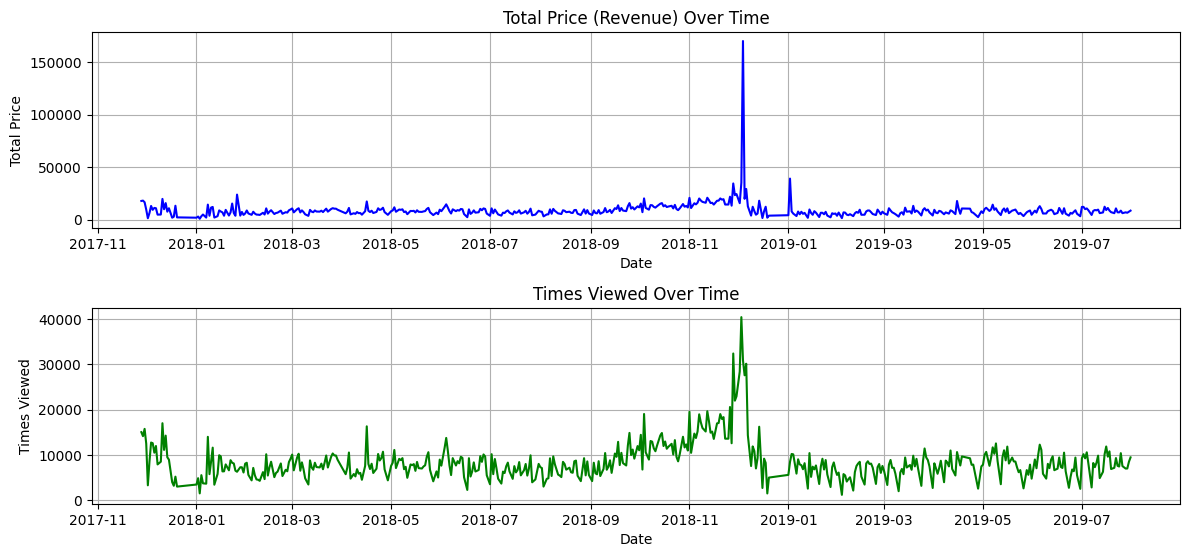

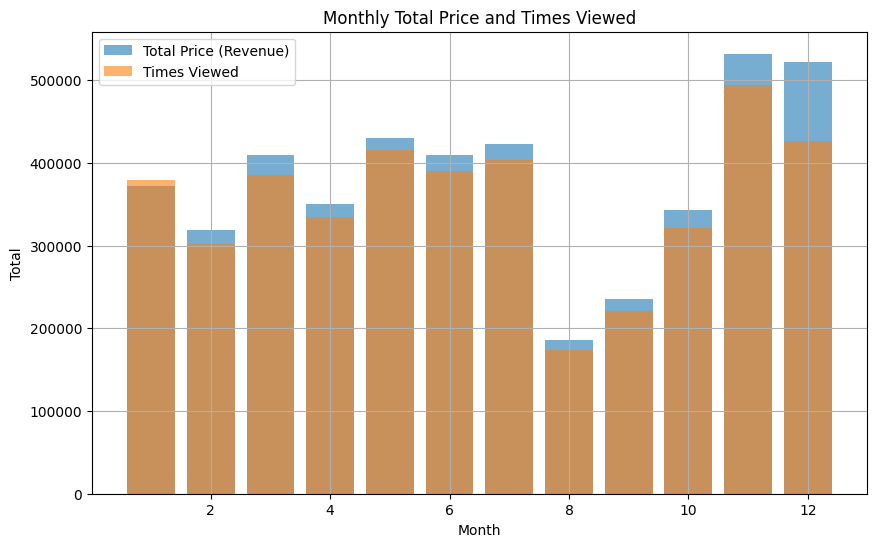

In [11]:
# Step 1: Check summary statistics of numerical and categorical columns
print(df_day.describe())  # Summary statistics for numerical columns
print(df_all['country'].value_counts())  # Frequency distribution of 'country'

# Step 2: Plot Time-Series Data for Revenue, Purchases, and Views
plt.figure(figsize=(12, 8))

# Plot Total Price (Revenue) over Time
plt.subplot(3, 1, 1)
plt.plot(df_day['date'], df_day['total_price'], label='Total Price', color='blue')
plt.title('Total Price (Revenue) Over Time')
plt.xlabel('Date')
plt.ylabel('Total Price')
plt.grid(True)

# Plot Times Viewed over Time
plt.subplot(3, 1, 2)
plt.plot(df_day['date'], df_day['times_viewed'], label='Times Viewed', color='green')
plt.title('Times Viewed Over Time')
plt.xlabel('Date')
plt.ylabel('Times Viewed')
plt.grid(True)

# You can add a plot for purchases if it's available in the dataset
# For now, assuming 'purchases' exists as an aggregate feature
# plt.subplot(3, 1, 3)
# plt.plot(df_day['date'], df_day['purchases'], label='Purchases', color='red')
# plt.title('Purchases Over Time')
# plt.xlabel('Date')
# plt.ylabel('Purchases')
# plt.grid(True)

plt.tight_layout()
plt.show()

# Step 3: Identify highest level of activity (by month)
df_day['month'] = df_day['date'].dt.month  # Extract month from the date
monthly_data = df_day.groupby('month').agg({'total_price': 'sum', 'times_viewed': 'sum'}).reset_index()

# Plot the aggregated data by month
plt.figure(figsize=(10, 6))
plt.bar(monthly_data['month'], monthly_data['total_price'], label='Total Price (Revenue)', alpha=0.6)
plt.bar(monthly_data['month'], monthly_data['times_viewed'], label='Times Viewed', alpha=0.6)
plt.title('Monthly Total Price and Times Viewed')
plt.xlabel('Month')
plt.ylabel('Total')
plt.legend()
plt.grid(True)
plt.show()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7euba8n5/gstdshqw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7euba8n5/68i_ovc2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55321', 'data', 'file=/tmp/tmp7euba8n5/gstdshqw.json', 'init=/tmp/tmp7euba8n5/68i_ovc2.json', 'output', 'file=/tmp/tmp7euba8n5/prophet_modelyugh12al/prophet_model-20250503014447.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:44:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:44:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


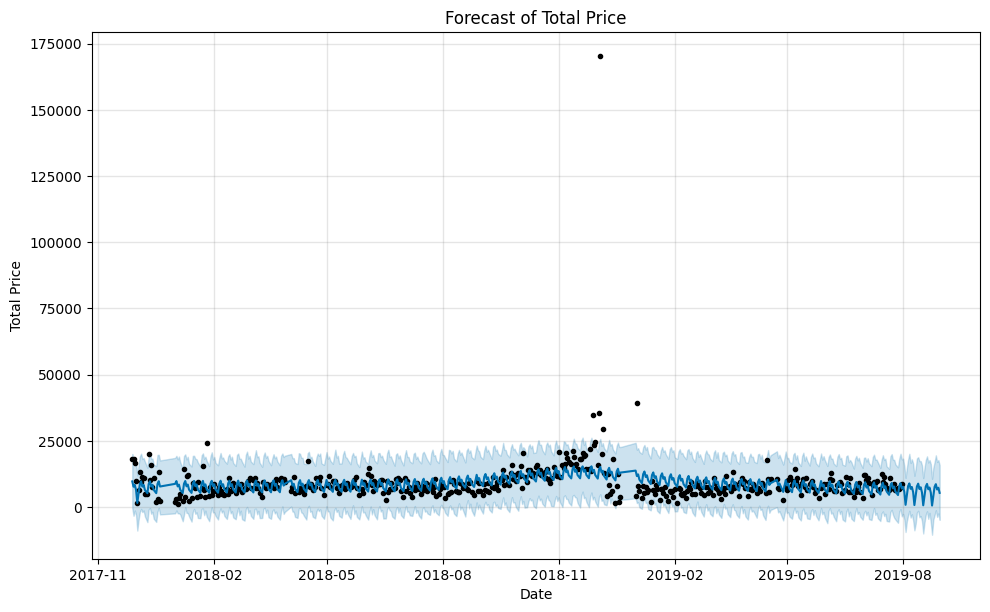

In [12]:
import matplotlib.pyplot as plt

# Prepare the data for Prophet (rename columns)
df_prophet = df_day[['date', 'total_price']].rename(columns={'date': 'ds', 'total_price': 'y'})

# Create and fit the Prophet model
model = Prophet(daily_seasonality=True)
model.fit(df_prophet)

# Create a DataFrame with future dates for forecasting (e.g., next 30 days)
future = model.make_future_dataframe(periods=30)

# Forecast the future
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title('Forecast of Total Price')
plt.xlabel('Date')
plt.ylabel('Total Price')
plt.show()

In [13]:
# Filter out extreme outliers in 'total_price'
df_day = df_day[df_day['total_price'] < 150000]

# Double-check if outliers were removed
print(df_day['total_price'].describe())  # Check summary statistics after removing outliers

count      494.000000
mean      8833.729542
std       4534.357988
min        965.850000
25%       6154.422176
50%       7991.708434
75%      10474.339753
max      39220.590000
Name: total_price, dtype: float64


In [16]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Merge forecast with actuals
df_eval = forecast[['ds', 'yhat']].merge(df_prophet[['ds', 'y']], on='ds', how='inner')

y_true = df_eval['y']
y_pred = df_eval['yhat']

# Compute MAE and RMSE manually
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))  # Manual RMSE

print("MAE:", round(mae, 2))
print("RMSE:", round(rmse, 2))

MAE: 2754.99
RMSE: 3955.13


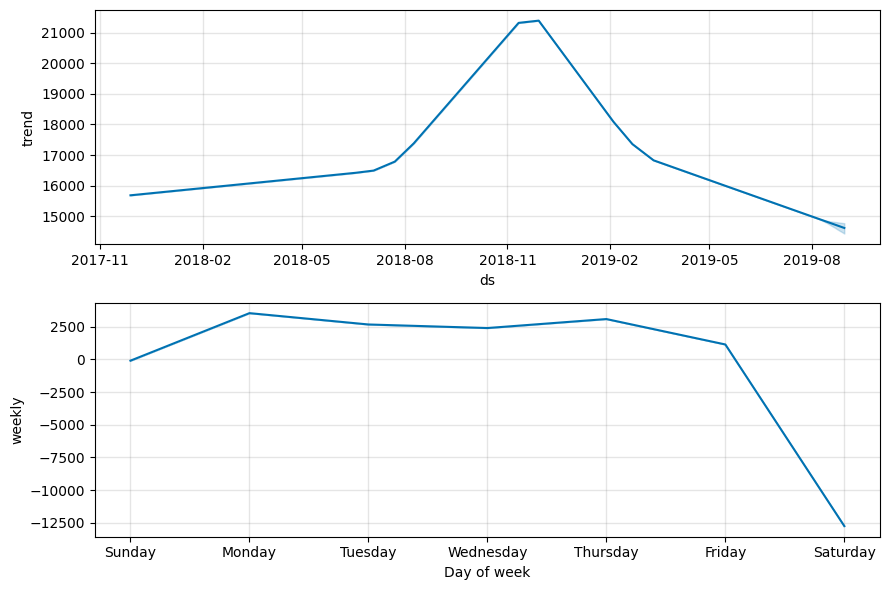

In [17]:
# Plot forecast components
fig2 = model.plot_components(forecast)
plt.show()

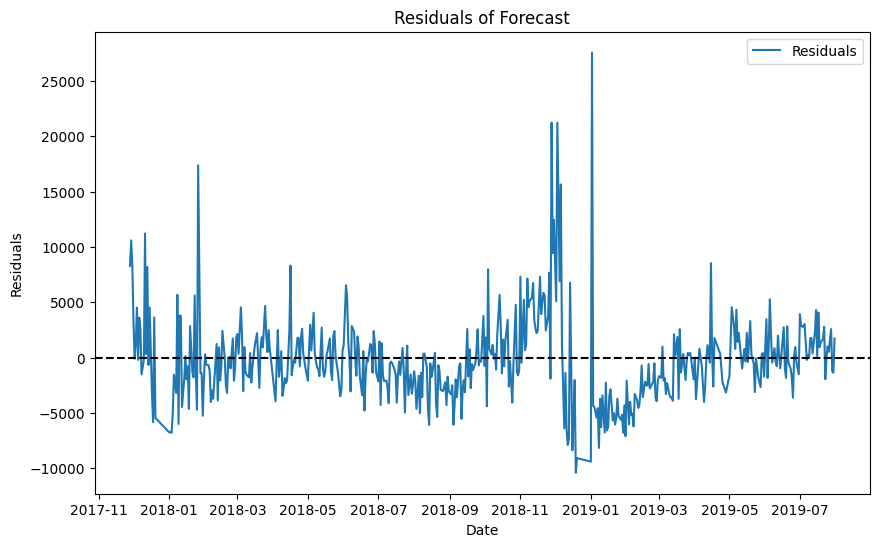

In [18]:
df_eval['residuals'] = df_eval['y'] - df_eval['yhat']

# Plot residuals
plt.figure(figsize=(10, 6))
plt.plot(df_eval['ds'], df_eval['residuals'], label='Residuals')
plt.axhline(0, color='black', linestyle='--')
plt.title('Residuals of Forecast')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.show()

In [19]:
from google.colab import files
files.upload()

Saving ts-all.csv to ts-all.csv


{'ts-all.csv': b'date,purchases,unique_invoices,unique_streams,total_views,year_month,revenue\n2017-11-01,0,0,0,0,2017-11,0.0\n2017-11-02,0,0,0,0,2017-11,0.0\n2017-11-03,0,0,0,0,2017-11,0.0\n2017-11-04,0,0,0,0,2017-11,0.0\n2017-11-05,0,0,0,0,2017-11,0.0\n2017-11-06,0,0,0,0,2017-11,0.0\n2017-11-07,0,0,0,0,2017-11,0.0\n2017-11-08,0,0,0,0,2017-11,0.0\n2017-11-09,0,0,0,0,2017-11,0.0\n2017-11-10,0,0,0,0,2017-11,0.0\n2017-11-11,0,0,0,0,2017-11,0.0\n2017-11-12,0,0,0,0,2017-11,0.0\n2017-11-13,0,0,0,0,2017-11,0.0\n2017-11-14,0,0,0,0,2017-11,0.0\n2017-11-15,0,0,0,0,2017-11,0.0\n2017-11-16,0,0,0,0,2017-11,0.0\n2017-11-17,0,0,0,0,2017-11,0.0\n2017-11-18,0,0,0,0,2017-11,0.0\n2017-11-19,0,0,0,0,2017-11,0.0\n2017-11-20,0,0,0,0,2017-11,0.0\n2017-11-21,0,0,0,0,2017-11,0.0\n2017-11-22,0,0,0,0,2017-11,0.0\n2017-11-23,0,0,0,0,2017-11,0.0\n2017-11-24,0,0,0,0,2017-11,0.0\n2017-11-25,0,0,0,0,2017-11,0.0\n2017-11-26,0,0,0,0,2017-11,0.0\n2017-11-27,0,0,0,0,2017-11,0.0\n2017-11-28,3223,166,1345,15047,2017-11,14

In [20]:
from flask import Flask, request, jsonify
import threading

app = Flask(__name__)

@app.route('/forecast', methods=['POST'])
def forecast():
    data = request.get_json()
    df = pd.DataFrame(data['data'])
    model = Prophet()
    model.fit(df)
    future = model.make_future_dataframe(periods=data['periods'])
    forecast = model.predict(future)
    forecast_json = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_dict(orient='records')
    return jsonify(forecast_json)

def run_flask():
    app.run(port=5000)

# Run Flask in a separate thread
thread = threading.Thread(target=run_flask)
thread.start()

 * Serving Flask app '__main__'
 * Debug mode: off


In [24]:
import requests

# Sample data for testing
data = {
    "data": [
        {"ds": "2017-11-01", "y": 120},
        {"ds": "2017-11-02", "y": 130},
        {"ds": "2017-11-03", "y": 140},
        {"ds": "2017-11-04", "y": 150},
    ],
    "periods": 5  # Number of periods to forecast
}

# Send POST request to Flask API
response = requests.post("http://127.0.0.1:5000/forecast", json=data)

# Get the forecasted data
forecast_data = response.json()

# Display the forecasted data
print(forecast_data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 2.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7euba8n5/jr7atigm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7euba8n5/j94anpuj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3035', 'data', 'file=/tmp/tmp7euba8n5/jr7atigm.json', 'init=/tmp/tmp7euba8n5/j94anpuj.json', 'output', 'file=/tmp/tmp7euba8n5/prophet_modelcmlf0081/prophet_model-20250503020649.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:06:49 - cmdstanpy - INFO - Chain [1] start processing
INF

[{'ds': 'Wed, 01 Nov 2017 00:00:00 GMT', 'yhat': 120.0, 'yhat_lower': 119.99999999999999, 'yhat_upper': 120.00000000000001}, {'ds': 'Thu, 02 Nov 2017 00:00:00 GMT', 'yhat': 130.0, 'yhat_lower': 129.99999999999997, 'yhat_upper': 130.00000000000003}, {'ds': 'Fri, 03 Nov 2017 00:00:00 GMT', 'yhat': 140.0, 'yhat_lower': 139.99999999999997, 'yhat_upper': 140.00000000000003}, {'ds': 'Sat, 04 Nov 2017 00:00:00 GMT', 'yhat': 150.00000000000003, 'yhat_lower': 150.0, 'yhat_upper': 150.00000000000006}, {'ds': 'Sun, 05 Nov 2017 00:00:00 GMT', 'yhat': 160.00000000000003, 'yhat_lower': 159.99999971233765, 'yhat_upper': 160.00000030450778}, {'ds': 'Mon, 06 Nov 2017 00:00:00 GMT', 'yhat': 170.00000000000009, 'yhat_lower': 169.99999906760974, 'yhat_upper': 170.00000101685245}, {'ds': 'Tue, 07 Nov 2017 00:00:00 GMT', 'yhat': 180.00000000000009, 'yhat_lower': 179.99999819572238, 'yhat_upper': 180.00000196695058}, {'ds': 'Wed, 08 Nov 2017 00:00:00 GMT', 'yhat': 190.0000000000001, 'yhat_lower': 189.9999971

In [31]:
# Assuming 'forecast' is generated by the model's predict method

# Ensure 'forecast' is correctly defined by the Prophet model's output
forecast = model.predict(future)

# Now, select the relevant columns from the forecast
forecast_df = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

# Check the columns of the forecast dataframe
print("Forecast Data (forecast_df) Columns:")
print(forecast_df.columns)

Forecast Data (forecast_df) Columns:
Index(['ds', 'yhat', 'yhat_lower', 'yhat_upper'], dtype='object')


In [32]:
print("Actual Data (df_prophet) Columns:")
print(df_prophet.columns)

print("Forecast Data (forecast_df) Columns:")
print(forecast_df.columns)

Actual Data (df_prophet) Columns:
Index(['ds', 'y'], dtype='object')
Forecast Data (forecast_df) Columns:
Index(['ds', 'yhat', 'yhat_lower', 'yhat_upper'], dtype='object')


In [33]:
print("Actual Data (df_prophet) Date Range:")
print(df_prophet['ds'].min(), df_prophet['ds'].max())

print("Forecast Data (forecast_df) Date Range:")
print(forecast_df['ds'].min(), forecast_df['ds'].max())

Actual Data (df_prophet) Date Range:
2017-11-28 00:00:00 2019-07-31 00:00:00
Forecast Data (forecast_df) Date Range:
2017-11-28 00:00:00 2019-08-30 00:00:00


In [34]:
print("Actual Data 'y' (df_prophet) Summary:")
print(df_prophet['y'].describe())  # Check summary statistics of actual values

print("Forecast Data 'yhat' (forecast_df) Summary:")
print(forecast_df['yhat'].describe())  # Check summary statistics of forecasted values

Actual Data 'y' (df_prophet) Summary:
count      494.000000
mean      8833.729542
std       4534.357988
min        965.850000
25%       6154.422176
50%       7991.708434
75%      10474.339753
max      39220.590000
Name: y, dtype: float64
Forecast Data 'yhat' (forecast_df) Summary:
count      525.000000
mean      8645.239953
std       3499.052220
min      -7885.420138
25%       6796.543955
50%       8212.869668
75%       9342.499810
max      21147.814723
Name: yhat, dtype: float64


In [35]:
print(forecast_df[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds          yhat    yhat_lower    yhat_upper
0 2017-11-28  18636.197879  15090.116019  22776.567341
1 2017-11-29  17999.862983  13991.075262  21979.686836
2 2017-11-30  18264.045416  14224.441096  22078.430815
3 2017-12-01  15839.802924  11970.050438  20052.971744
4 2017-12-02   1415.681234  -2625.271628   5550.270954


In [43]:
# Ensure both dataframes have matching columns and reset index if needed
df_prophet = df_prophet.reset_index(drop=True)  # Reset index for df_prophet
forecast_df = forecast_df.reset_index(drop=True)  # Reset index for forecast_df

# Check if dates match between the two dataframes
matching_dates = df_prophet['ds'].isin(forecast_df['ds'].values)

# Print Actual data for matching dates
print("Matching Dates Between Actual and Forecast Data:")
print(df_prophet[matching_dates][['ds', 'y']].head())  # Actual data for matching dates

# Print Forecasted data for matching dates
forecasted_data = forecast_df[matching_dates][['ds', 'yhat']].head()  # Forecasted data for matching dates
print(forecasted_data)

Matching Dates Between Actual and Forecast Data:
          ds             y
0 2017-11-28  17930.578687
1 2017-11-29  18230.997939
2 2017-11-30  16701.085082
3 2017-12-01   9687.280000
4 2017-12-02   1443.260000


<ipython-input-43-cc77e9f3339e>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  forecasted_data = forecast_df[matching_dates][['ds', 'yhat']].head()  # Forecasted data for matching dates


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

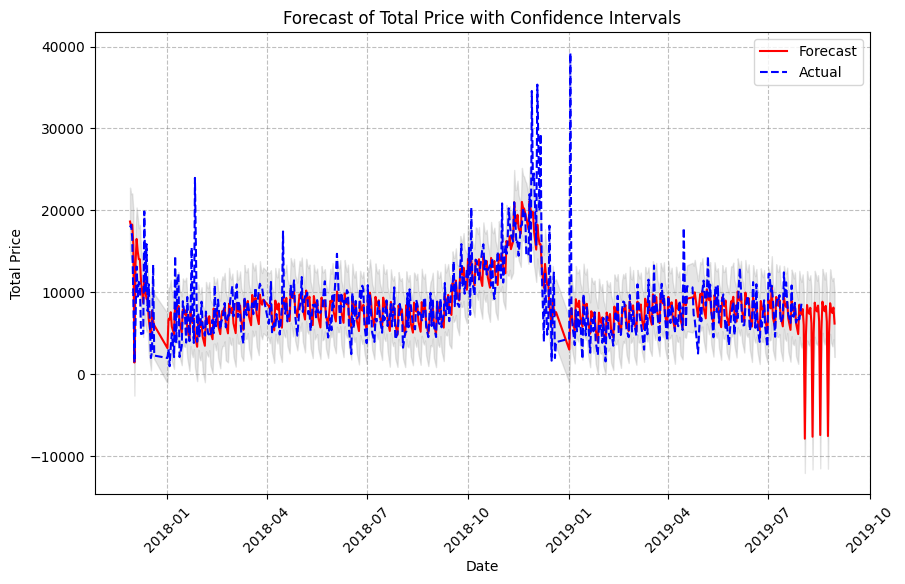

In [42]:
plt.figure(figsize=(10, 6))

# Plot forecasted values (yhat)
plt.plot(forecast_df['ds'], forecast_df['yhat'], label='Forecast', color='red')

# Plot actual values (only for the historical period)
plt.plot(df_prophet['ds'], df_prophet['y'], label='Actual', color='blue', linestyle='--')

# Fill the area between yhat_lower and yhat_upper (confidence intervals)
plt.fill_between(forecast_df['ds'], forecast_df['yhat_lower'], forecast_df['yhat_upper'], color='gray', alpha=0.2)

# Title and labels
plt.title('Forecast of Total Price with Confidence Intervals')
plt.xlabel('Date')
plt.ylabel('Total Price')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid with customization
plt.grid(True, linestyle='--', color='gray', alpha=0.5)

# Add legend
plt.legend()

# Show the plot
plt.show()

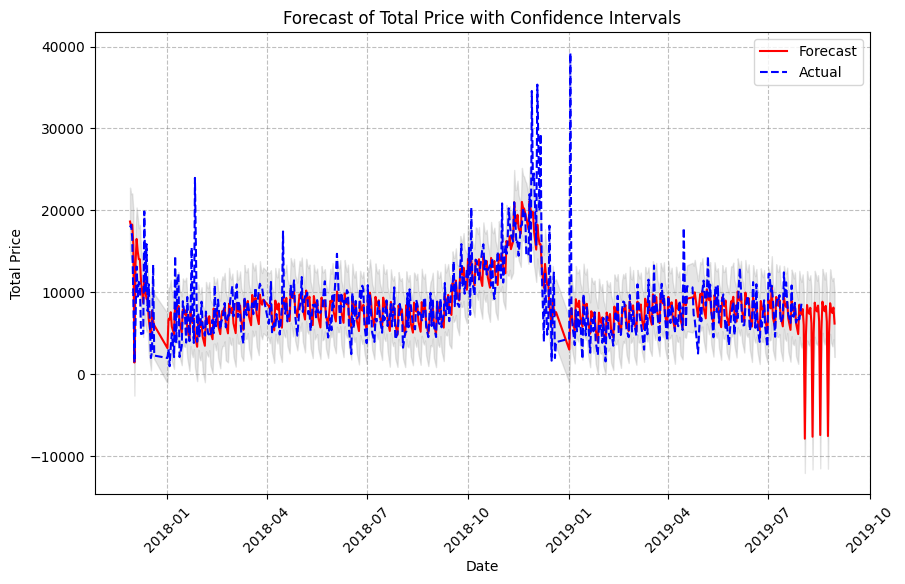

In [45]:
# Ensure 'ds' columns are in datetime format
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])
forecast_df['ds'] = pd.to_datetime(forecast_df['ds'])

# Filter actual data to match the forecast range
df_actual = df_prophet[df_prophet['ds'] <= forecast_df['ds'].max()]

# Plot the forecasted values
plt.figure(figsize=(10, 6))

# Plot the forecasted values
plt.plot(forecast_df['ds'], forecast_df['yhat'], label='Forecast', color='red')

# Plot the actual values (only for the historical period)
plt.plot(df_actual['ds'], df_actual['y'], label='Actual', color='blue', linestyle='--')

# Fill the area between yhat_lower and yhat_upper (confidence intervals)
plt.fill_between(forecast_df['ds'], forecast_df['yhat_lower'], forecast_df['yhat_upper'], color='gray', alpha=0.2)

# Title and labels
plt.title('Forecast of Total Price with Confidence Intervals')
plt.xlabel('Date')
plt.ylabel('Total Price')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid with customization
plt.grid(True, linestyle='--', color='gray', alpha=0.5)

# Add legend
plt.legend()

# Show the plot
plt.show()